# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])

In [4]:
df = pd.merge(df, pd.DataFrame({'total_EOS' : df[df.token == 'EOS'].groupby('account')['amount'].sum()}), on='account').reset_index()
df['amount_ratio'] = df['amount']/df['total_EOS']

In [5]:
df

,index,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action,total_EOS,amount_ratio
0,0,eosio.vpay,2022-10-24 00:00:02,2022-10-24 00:00:02,135.7596,EOS,eosio.vpay,eosvenezuela,274786211,7c5164317624b8793d0988ffde87e38e762d197616dfa4...,producer vote pay,eosio.token,transfer,78343.1876,0.001733
1,1,eosio.vpay,2022-10-24 00:03:51,2022-10-24 00:03:51,707.8004,EOS,eosio.vpay,newdex.bp,274786669,5111bf06550ae4f49ccb573f6e21cd5466c94d521f849e...,producer vote pay,eosio.token,transfer,78343.1876,0.009035
2,2,eosio.vpay,2022-10-24 00:04:30,2022-10-24 00:04:30,650.3109,EOS,eosio.vpay,aus1genereos,274786747,2e05773a148e569bd8210c20adbba070020dd38d62b529...,producer vote pay,eosio.token,transfer,78343.1876,0.008301
3,3,eosio.vpay,2022-10-24 00:27:38,2022-10-24 00:27:38,604.6785,EOS,eosio.vpay,starteosiobp,274789518,c1539862a311cf4f2dd89abb9d74016343e5db6a67848e...,producer vote pay,eosio.token,transfer,78343.1876,0.007718
4,4,eosio.vpay,2022-10-24 00:36:03,2022-10-24 00:36:03,542.2193,EOS,eosio.vpay,bitfinexeos1,274790528,d66f79a507d9d833200cd96b7660a624d95517e2c92352...,producer vote pay,eosio.token,transfer,78343.1876,0.006921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,291,eosio.bpay,2022-10-23 14:48:56,2022-10-23 14:48:56,344.5585,EOS,eosio.bpay,whaleex.com,274720117,59670681dcffe29ad3609375e0988e41cb73c6477ff226...,producer block pay,eosio.token,transfer,26568.7717,0.012969
292,292,eosio.bpay,2022-10-23 15:46:42,2022-10-23 15:46:42,344.0749,EOS,eosio.bpay,eosiosg11111,274727042,bba941c31fbc737e3f2e5697d0fc707011fbc30a929211...,producer block pay,eosio.token,transfer,26568.7717,0.012950
293,293,eosio.bpay,2022-10-23 15:48:25,2022-10-23 15:48:25,345.0793,EOS,eosio.bpay,okcapitalbp1,274727249,d49e1df619f6bc4856fb5d8fb9a4b19dd0b4bda3540a4d...,producer block pay,eosio.token,transfer,26568.7717,0.012988
294,294,eosio.bpay,2022-10-23 17:37:12,2022-10-23 17:37:12,345.1161,EOS,eosio.bpay,atticlabeosb,274740290,6410db472b67112226b9667bb70ad4be840bce9645809b...,producer block pay,eosio.token,transfer,26568.7717,0.012990


In [6]:
from pysankey import sankey
import seaborn as sns

In [7]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


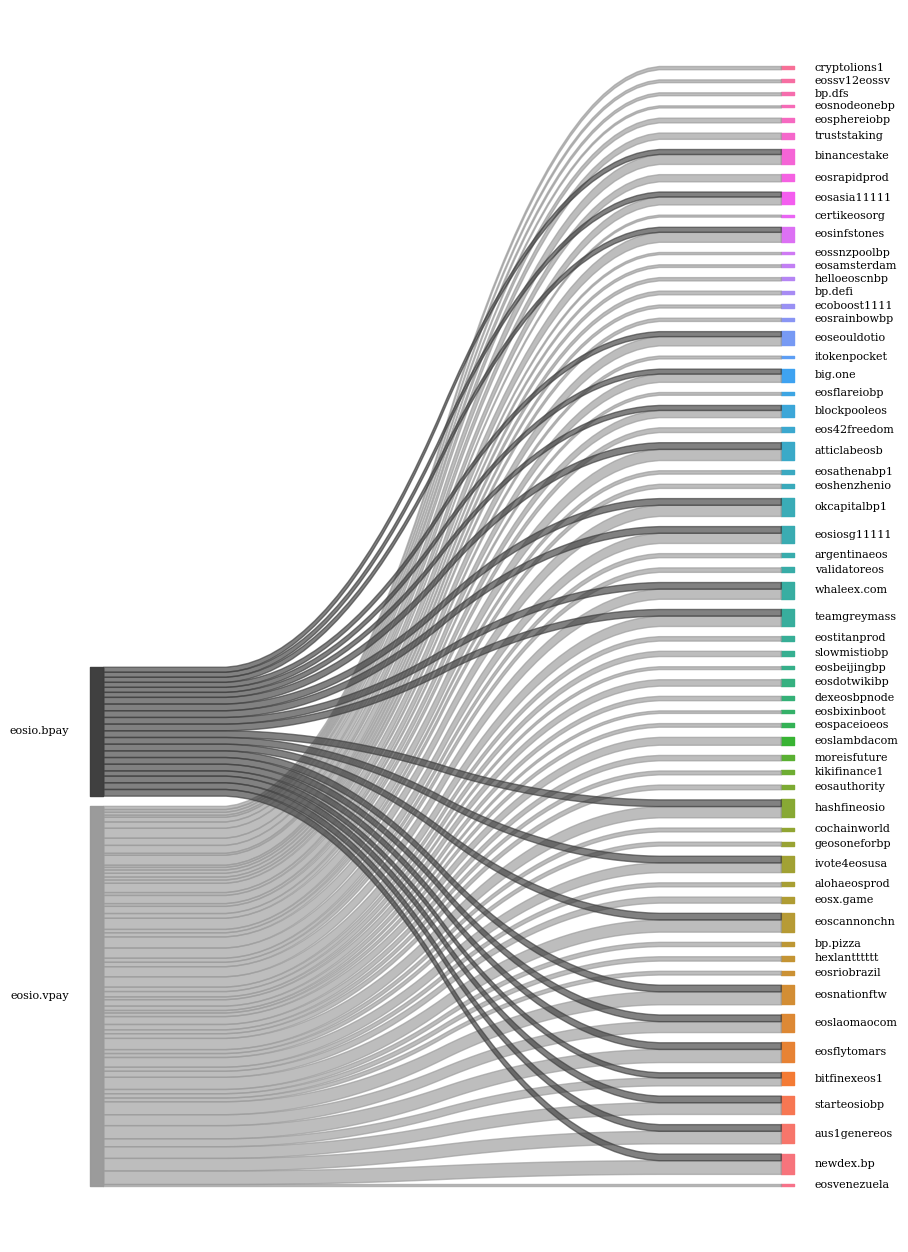

In [8]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)